In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from parameters import *
import scipy as sci
import scipy.special as sp
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm, colors
from scipy import integrate
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from scipy.stats import norm
import matplotlib.mlab as mlab
import camb
import numpy as np
from lib3 import *
import healpy as hp

In [42]:
planck_IQU_SMICA= hp.fitsfunc.read_map("./Data SupernovaLBLgov/COM_CMB_IQU-smica_1024_R2.02_full.fits", dtype=np.float)
planck_theory_cl = np.loadtxt("./Data SupernovaLBLgov/COM_PowerSpect_CMB-base-plikHM-TTTEEE-lowl-lowE-lensing-minimum-theory_R3.01.txt")

NSIDE = 1024
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT


/Users/mp74207/.local/lib/python3.7/site-packages/healpy-1.13.0-py3.7-macosx-10.9-x86_64.egg/healpy/fitsfunc.py:403: UserWarning: No INDXSCHM keyword in header file : assume IMPLICIT
  warnings.warn("No INDXSCHM keyword in header file : " "assume {}".format(schm))


Ordering converted to RING


0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


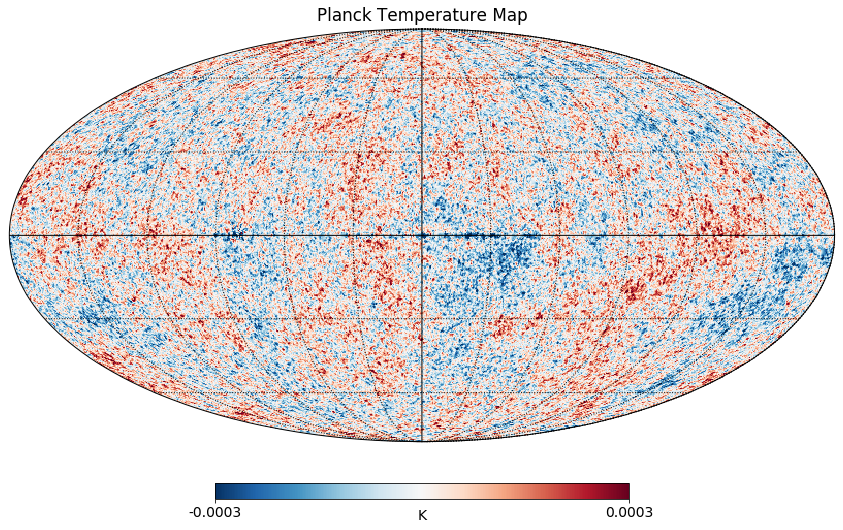

In [60]:
fig = plt.figure(1, figsize=[12,12])
hp.mollview(planck_IQU_SMICA, min=-0.0003, max=+0.0003,title="Planck Temperature Map", fig=1, unit="K", cmap=cm.RdBu_r)
hp.graticule()

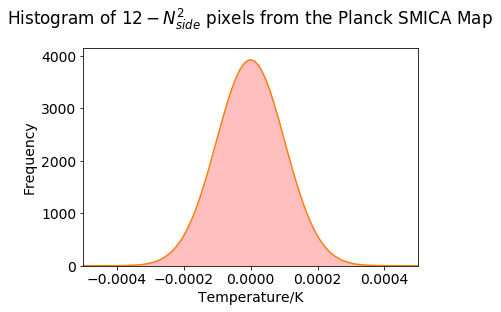

In [44]:


(mu, sigma) = norm.fit(planck_IQU_SMICA)
fig, ax = plt.subplots()
n, bins, patch = plt.hist(planck_IQU_SMICA, 600, density=1, facecolor="r", alpha=0.25)
y = norm.pdf(bins, mu,sigma)
plt.plot(bins,y)
plt.xlim(-0.0005,0.0005)
plt.xlabel("Temperature/K")
plt.ylabel("Frequency")
plt.title(r"Histogram of $12-N_{side}^2$ pixels from the Planck SMICA Map ", y=1.08)
plt.show()

In [45]:
cp=camb.model.CAMBparams()
TO=2.725
H0=71
cp.set_cosmology(TCMB=TO, H0=H0)
cp.set_for_lmax(2600)
cp.InitPower.set_params()

class: <InitialPowerLaw>
 tensor_parameterization = tensor_param_rpivot
 ns = 0.96
 nrun = 0.0
 nrunrun = 0.0
 nt = -0.0
 ntrun = -0.0
 r = 0.0
 pivot_scalar = 0.05
 pivot_tensor = 0.05
 As = 2e-09
 At = 1.0
 

In [46]:
cp.validate()

True

In [47]:
results = camb.get_results(cp)
powers = results.get_cmb_power_spectra()
for name in powers: print(name)

total
unlensed_scalar
unlensed_total
lensed_scalar
tensor
lens_potential


In [48]:
totCL=powers['total']
tOeq= TO**2
totCL=tOeq*totCL
totCL=totCL*1E12
print(totCL.shape)


(2651, 4)


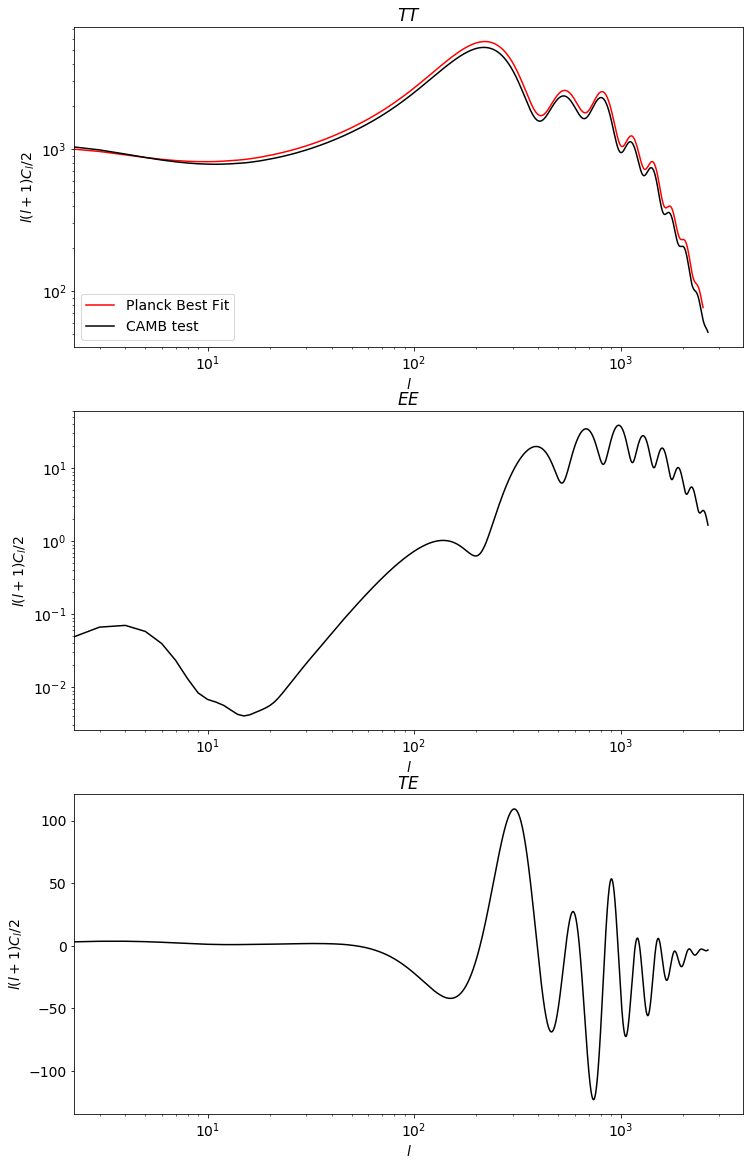

In [49]:
plt.rcParams.update({'font.size':14})
ls = np.arange(totCL.shape[0])
fig, ax = plt.subplots(3,1, figsize=[12,20])
ax[0].set_xlabel('$l$')
ax[0].set_ylabel('$l(l+1)C_l/2$')
ax[0].plot(planck_theory_cl[:,0],planck_theory_cl[:,1], "-r", label="Planck Best Fit")
ax[0].plot(ls,totCL[:,0], "-k", label="CAMB test")
ax[0].set_xscale("log")
ax[0].set_yscale("log")
ax[0].legend(loc="lower left")
ax[0].set_title("$TT$")

ax[1].plot(ls,totCL[:,1], "-k")
ax[1].set_xlabel('$l$')
ax[1].set_ylabel('$l(l+1)C_l/2$')
ax[1].set_xscale("log")
ax[1].set_yscale("log")
ax[1].set_title("$EE$")

ax[2].plot(ls,totCL[:,3], "-k")
ax[2].set_xlabel('$l$')
ax[2].set_ylabel('$l(l+1)C_l/2$')
ax[2].set_xscale("log")
ax[2].set_title("$TE$")

for ax0 in ax.reshape(-1):ax0.set_xlim(2.2500)

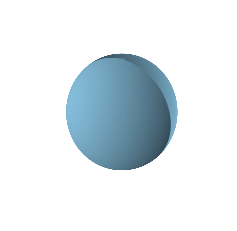

In [50]:
theta, phi, x, y, z = getSphericalXYZ(n=100,m=100)

l=0; m=0
fcolors = sp.sph_harm(m,l, theta, phi).real
plot_harmonics(fcolors, x, y, z)

Text(0.5, 1.0, "Beam Window Function for $\\theta_{FWHM}$ of 30'")

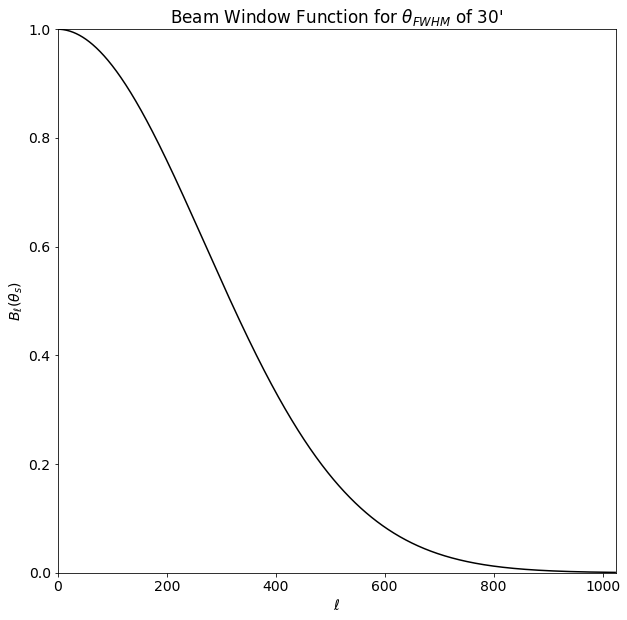

In [51]:
ls= np.arange(1024)
beam_arcmin = 30.0
fig, ax = plt.subplots(1,1, figsize=[10,10])
ax.plot(ls, B_l(beam_arcmin, ls), color="k")
ax.set_xlim(0,1024)
ax.set_ylim(0,1)
ax.set_xlabel(r'$\ell$')
ax.set_ylabel(r'$B_\ell(\theta_s)$')
ax.set_title(r"Beam Window Function for $\theta_{FWHM}$ of 30'" )

In [52]:
white_noise = np.ma.asarray(np.random.normal(0,0.0001, 12*1024**2))

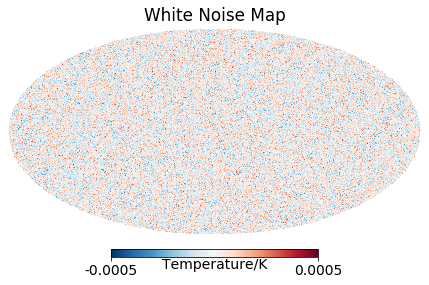

In [53]:
fig = plt.figure()
hp.mollview(white_noise, min=-0.0005, max=0.0005, title="White Noise Map", fig=1, unit=r'Temperature/K', cmap=cm.RdBu_r)

Text(0.5, 1.0, 'Histogram of $12N_(side)^2$ random sampels from a normal (Gaussian) distribution ')

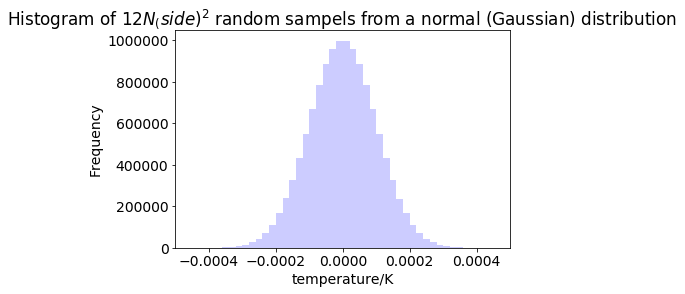

In [54]:
plt.hist(white_noise, bins=np.arange(-0.0005,0.0005, 0.00002), color='b', alpha=0.2 )
plt.xlim(-0.0005, 0.0005)
plt.xlabel("temperature/K")
plt.ylabel('Frequency')
plt.title("Histogram of $12N_(side)^2$ random sampels from a normal (Gaussian) distribution ")

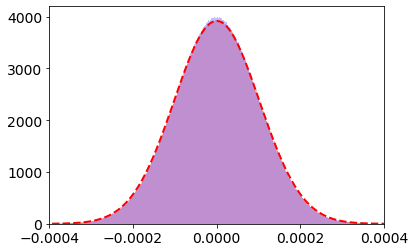

In [55]:

(mu,sigma) = norm.fit(planck_IQU_SMICA)
n, bins, patches = plt.hist(planck_IQU_SMICA, 600, density=1, facecolor='r', alpha=0.25)
y = norm.pdf(bins, mu, sigma)
l=plt.plot(bins, y, 'r--', linewidth= 2)
plt.xlim(-0.0004,0.0004)
n, bins, patches = plt.hist(white_noise, 600, density=1, facecolor='b', alpha=0.25)

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


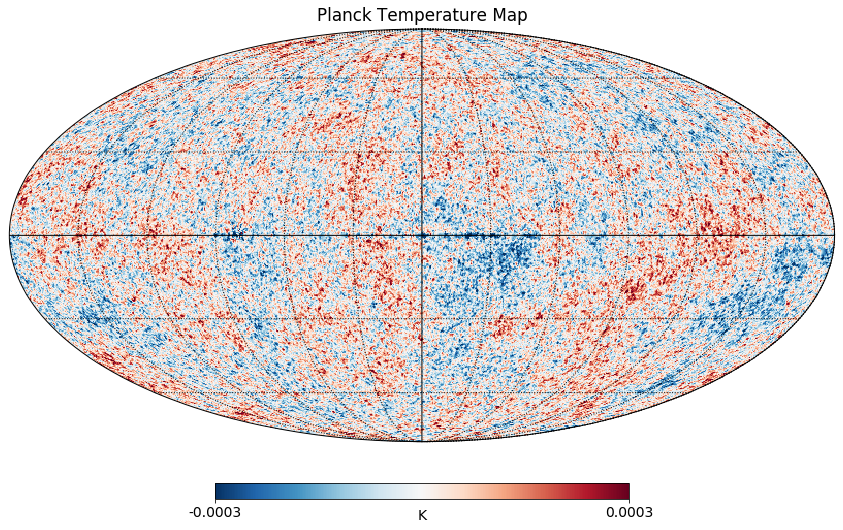

In [61]:
fig = plt.figure(1, figsize=[12,12])
hp.mollview(planck_IQU_SMICA, min=-0.0003, max=+0.0003,title="Planck Temperature Map", fig=1, unit="K", cmap=cm.RdBu_r)
hp.graticule()

In [62]:
cl_SMICA = hp.anafast(planck_IQU_SMICA, lmax=1024)
ell = np.arange(len(cl_SMICA))
pl = hp.sphtfunc.pixwin(1024)
# Deconvolve the beam and the pixel window function
dl_SMICA = cl_SMICA/(B_l(10.0, ell)**2*pl[0:1025]**2)
dl_SMICA = (ell*(ell+1)* dl_SMICA/(2*math.pi))/1E-12
cl_white = hp.anafast(white_noise, lmax=1024)
dl_white = (ell*(ell+1)* cl_white/(2*math.pi))/1E-12

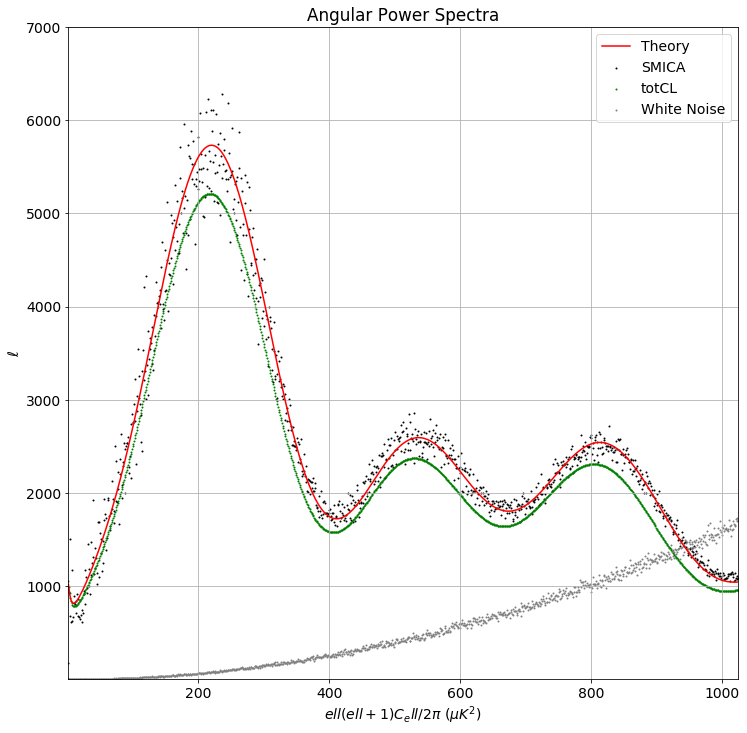

In [58]:
fig = plt.figure(figsize=[12,12])
ax = fig.add_subplot(111)
ax.scatter(ell, dl_SMICA,
          s=4, c='black', lw=0, label = "SMICA")
ax.scatter(np.arange(totCL.shape[0]), totCL[:,0],
          s=4, c='green', lw=0, label = "totCL")
ax.scatter(ell, dl_white,
          s=4, c='grey', lw=0, label = "White Noise")
ax.set_xlabel("$ell(ell+1)C_ell/2\pi \, \,(\mu K^2)$")

ax.plot(planck_theory_cl[:,0], planck_theory_cl[:,1], '-r', label="Theory")

ax.set_ylabel('$\ell$')
ax.set_title("Angular Power Spectra")
ax.legend(loc="upper right")
# ax.set_yscale("log")
ax.set_xlim(2,1024)
ax.set_ylim(2,7000)
ax.grid()

In [59]:
# hp.xyf2pix()